In [37]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import altair as alt
import time
import sklearn
import warnings
import pickle

warnings.filterwarnings(action='ignore', category=FutureWarning)

pd.__version__, sklearn.__version__

('2.1.1', '1.3.1')

In [38]:
SCRATCH_DIR = "/scratch/siads696f23_class_root/siads696f23_class/psollars"

# For local dev
SCRATCH_DIR = "./../data"

In [39]:
# Checkpoint
consolidated_df = pd.read_parquet(f"{SCRATCH_DIR}/consolidated_features_2019.parquet")

In [40]:
num_cols = [
    "Quarter",
    "Month",
    "DayofMonth",
    "DayOfWeek",
    "CRSDepTime",
    "CRSArrTime",
    "CRSElapsedTime",
    "Distance",
    # "DistanceGroup",
    "YEAR MFR",
    # "HORSEPOWER",
    # "THRUST",
    # "NO-SEATS",
    "Origin_LATITUDE",
    "Origin_LONGITUDE",
    "Dest_LATITUDE",
    "Dest_LONGITUDE",
]

cat_cols = [
    "Reporting_Airline",
    # "Tail_Number",
    "Origin",
    "Dest",
    # "TYPE REGISTRANT",
    # "NAME",
    # "CERTIFICATION",
    # "TYPE ENGINE",
    # "STATUS CODE",
    # "MFR",
    # "MODEL",
    # "TYPE",
    # "MFR_aircraft",
    # "MODEL_aircraft",
    # "TYPE-ENG",

    # Only concerned with weather delays for this round
    # "DepDel15",
    # "ArrDel15",
    # "CarrierDelay",
    "WeatherDelay",
    # "NASDelay",
    # "SecurityDelay",
    # "LateAircraftDelay",
]

list(consolidated_df.columns)

['Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'CRSDepTime',
 'CRSArrTime',
 'CRSElapsedTime',
 'Distance',
 'DistanceGroup',
 'YEAR MFR',
 'HORSEPOWER',
 'THRUST',
 'NO-SEATS',
 'Origin_LATITUDE',
 'Origin_LONGITUDE',
 'Dest_LATITUDE',
 'Dest_LONGITUDE',
 'Reporting_Airline',
 'Tail_Number',
 'Origin',
 'Dest',
 'TYPE REGISTRANT',
 'NAME',
 'CERTIFICATION',
 'TYPE ENGINE',
 'STATUS CODE',
 'MFR',
 'MODEL',
 'TYPE',
 'MFR_aircraft',
 'MODEL_aircraft',
 'TYPE-ENG',
 'BUILD-CERT-IND',
 'Origin_DISPLAY_AIRPORT_NAME',
 'Origin_DISPLAY_AIRPORT_CITY_NAME_FULL',
 'Dest_DISPLAY_AIRPORT_NAME',
 'Dest_DISPLAY_AIRPORT_CITY_NAME_FULL',
 'DepDel15',
 'ArrDel15',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']

In [41]:
weather_df = consolidated_df[num_cols + cat_cols].copy()

weather_df.head()

,Quarter,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,CRSElapsedTime,Distance,YEAR MFR,Origin_LATITUDE,Origin_LONGITUDE,Dest_LATITUDE,Dest_LONGITUDE,Reporting_Airline,Origin,Dest,WeatherDelay
24733033,1,1,4,5,1400,1510,70,190,2003.0,35.237222,-120.642500,37.618889,-122.375556,OO,SBP,SFO,0
24733034,1,1,4,5,0935,1118,103,438,2002.0,29.984444,-95.341389,36.281667,-94.307778,OO,IAH,XNA,0
24733035,1,1,4,5,0643,0855,132,513,2002.0,37.245556,-93.388611,29.984444,-95.341389,OO,SGF,IAH,0
24733036,1,1,4,5,1335,1433,118,576,2002.0,48.178056,-103.642222,39.861667,-104.673056,OO,ISN,DEN,0
24733037,1,1,4,5,0836,1040,184,896,2014.0,42.946944,-87.896944,39.861667,-104.673056,OO,MKE,DEN,0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder


correlation_df = weather_df[num_cols + cat_cols].copy()

ordinal_encoder = OrdinalEncoder()

for col in cat_cols:
    correlation_df[col] = ordinal_encoder.fit_transform(
        correlation_df[col].values.reshape(-1, 1)
    )

correlation_matrix = correlation_df.corr()

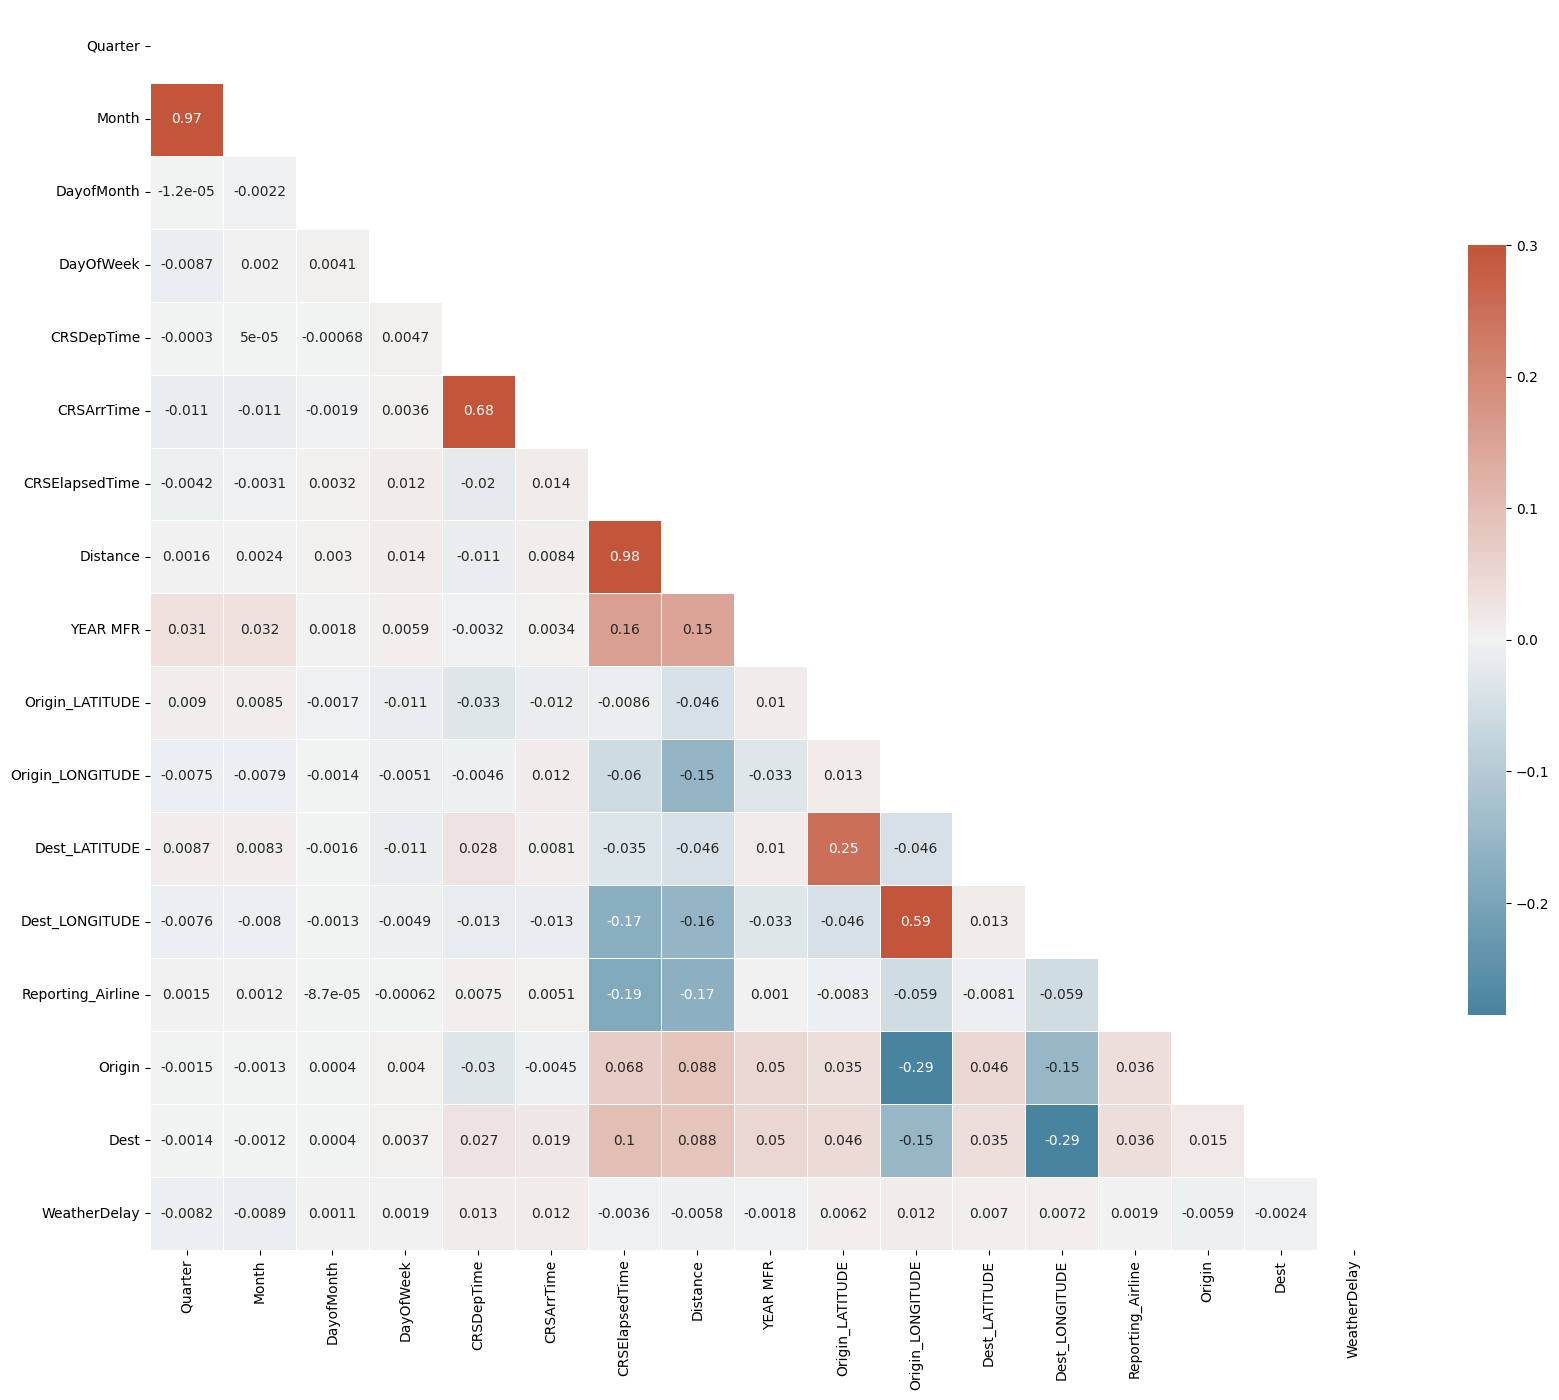

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(20, 20))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    correlation_matrix,
    mask=mask,
    cmap=cmap,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True,
)

plt.show()

In [9]:
list(weather_df.columns)

['Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'CRSDepTime',
 'CRSArrTime',
 'CRSElapsedTime',
 'Distance',
 'YEAR MFR',
 'Origin_LATITUDE',
 'Origin_LONGITUDE',
 'Dest_LATITUDE',
 'Dest_LONGITUDE',
 'Reporting_Airline',
 'Origin',
 'Dest',
 'WeatherDelay']

In [42]:
num_cols = [
    "Quarter",
    "Month",
    "DayofMonth",
    "DayOfWeek",
    "CRSDepTime",
    "CRSArrTime",
    "CRSElapsedTime",
    "Distance",
    "YEAR MFR",
    "Origin_LATITUDE",
    "Origin_LONGITUDE",
    "Dest_LATITUDE",
    "Dest_LONGITUDE",
]

cat_cols = [
    "Reporting_Airline",
    "Origin",
    "Dest",
    #  'WeatherDelay' # convert this to "delayed"
]

weather_df["delayed"] = weather_df["WeatherDelay"].gt(15)

labeled_df = weather_df.drop("WeatherDelay", axis=1)

labeled_df = labeled_df.dropna(axis="index", how=("any"))

labeled_df.value_counts("delayed")

# False    7037279
# True       52754

delayed
False    6908083
True       52754
Name: count, dtype: int64

In [43]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer


start_time = time.time()

# Separate features and labels
X = labeled_df.drop("delayed", axis=1)
y = labeled_df["delayed"]

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        # ("cat", OneHotEncoder(), cat_cols),
        ("cat", OrdinalEncoder(), cat_cols),
    ]
)

# Fit and transform the entire dataset
X_transformed = preprocessor.fit_transform(X)

end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

Elapsed time: 29.9525 seconds


In [44]:
from sklearn.model_selection import train_test_split

start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42
)

end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

Elapsed time: 1.8370 seconds


In [45]:
from sklearn.linear_model import Ridge


ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

feature_names = num_cols + list(
    preprocessor.named_transformers_["cat"].get_feature_names_out(cat_cols)
)

coefficients = ridge.coef_

feature_importance = list(zip(feature_names, coefficients))

sorted_features = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)

sorted_features

[('Distance', -0.002431213663853529),
 ('CRSElapsedTime', 0.002404437938817434),
 ('Month', -0.002075755922076463),
 ('Origin_LONGITUDE', 0.0015499913664678755),
 ('CRSDepTime', 0.0011526481796226063),
 ('CRSArrTime', 0.0008973130323400815),
 ('Quarter', 0.00081877726517992),
 ('Dest_LATITUDE', 0.00026877720514086593),
 ('DayOfWeek', 0.00023762767995123057),
 ('DayofMonth', 0.000192405230674483),
 ('Origin_LATITUDE', 0.00018593309612876749),
 ('YEAR MFR', 0.00016446752848506898),
 ('Dest_LONGITUDE', 0.0001472664393434092),
 ('Reporting_Airline', 2.2026699627547633e-05),
 ('Origin', -3.598070771635245e-06),
 ('Dest', -1.4017448510378563e-06)]

In [46]:
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

feature_names = num_cols + list(
    preprocessor.named_transformers_["cat"].get_feature_names_out(cat_cols)
)

important_features = np.nonzero(lasso.coef_)[0]
important_feature_names = [feature_names[i] for i in important_features]


important_feature_names  # not good :(

[]

In [47]:
from imblearn.over_sampling import SMOTE

start_time = time.time()

smote = SMOTE(sampling_strategy="auto", random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

Elapsed time: 9.4813 seconds


In [24]:
with open(f"{SCRATCH_DIR}/15_weather_2019_X_res_auto.pkl", "wb") as f:
    pickle.dump(X_res, f)

with open(f"{SCRATCH_DIR}/15_weather_2019_y_res_auto.pkl", "wb") as f:
    pickle.dump(y_res, f)

In [8]:
with open(f"{SCRATCH_DIR}/15_weather_2019_X_res_auto.pkl", "rb") as f:
    X_res = pickle.load(f)

with open(f"{SCRATCH_DIR}/15_weather_2019_y_res_auto.pkl", "rb") as f:
    y_res = pickle.load(f)

In [48]:
# Trying a grid search to improve recall

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE


def fit_grid_search_gradient_boost(fit_X_train, fit_y_train):
    start_time = time.time()

    #     ftwo_scorer = make_scorer(fbeta_score, beta=2)

    scorer = make_scorer(recall_score)

    model = GridSearchCV(
        LogisticRegression(solver="saga", max_iter=1000),
        param_grid={},
        scoring=scorer,  # "average_precision",
        cv=5,
        n_jobs=-1,
    )

    model.fit(fit_X_train, fit_y_train)

    end_time = time.time()

    print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

    return model

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score
import xgboost as xgb


def fit_grid_search_xg_boost(fit_X_train, fit_y_train):
    print(">>>", sum(fit_y_train == 0) / sum(fit_y_train == 1))

    xgb_clf = xgb.XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        # Handle imbalance
        scale_pos_weight=sum(fit_y_train == 0) / sum(fit_y_train == 1),
    )

    #     ftwo_scorer = make_scorer(fbeta_score, beta=2)
    scorer = make_scorer(recall_score)

    grid_search = GridSearchCV(
        estimator=xgb_clf,
        param_grid={
            "learning_rate": [0.1],  # , 0.2, 0.3],
            "max_depth": [10],  # [5, 7, 10],
            "n_estimators": [150],  # , 250, 500],
            "subsample": [0.7],  # [0.6, 0.7, 0.8],
            "colsample_bytree": [0.7],  # [0.6, 0.7, 0.8],
        },
        scoring=scorer,  # "average_precision",
        cv=5,
        n_jobs=-1,
    )

    grid_search.fit(fit_X_train, fit_y_train)

    return grid_search

In [50]:
start_time = time.time()

model = fit_grid_search_xg_boost(X_res, y_res)

end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

>>> 1.0


/Users/Pat/Documents/umich/2023-09 SIADS 696/.venv/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/Pat/Documents/umich/2023-09 SIADS 696/.venv/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/Pat/Documents/umich/2023-09 SIADS 696/.venv/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/Pat/Documents/umich/2023-09 SIADS 696/.venv/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if i

Elapsed time: 947.5391 seconds


In [51]:
# Checkpoint on the xgboost model

with open(f"{SCRATCH_DIR}/15_weather_delays_xgboost_smote.pkl", "wb") as f:
    pickle.dump(model, f)

# with open(f"{SCRATCH_DIR}/15_weather_delays_xgboost_smote.pkl", "rb") as f:
#     model = pickle.load(f)

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


def fit_grid_search_random_forest(fit_X_train, fit_y_train):
    start_time = time.time()

    rf_clf = RandomForestClassifier(class_weight="balanced", random_state=42)

    grid_search = GridSearchCV(
        estimator=rf_clf,
        param_grid={
            "n_estimators": [100],  # [50, 100, 150],
            "max_depth": [None],  # , 10, 20, 30],
            "min_samples_split": [2],  #  5, 10],
            "min_samples_leaf": [1],  #  2, 4],
        },
        cv=5,
        n_jobs=-1,
    )
    grid_search.fit(fit_X_train, fit_y_train)

    end_time = time.time()

    print(f"Finished Fitting Model: {(end_time - start_time):.4f} seconds")

    return grid_search

In [140]:
start_time = time.time()

model = fit_grid_search_random_forest(X_train, y_train)

end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

Finished Fitting Model: 6496.3723 seconds
Elapsed time: 6496.5838 seconds


In [141]:
# Checkpoint on the random forest model

with open(f"{SCRATCH_DIR}/14_weather_delays_random_forest.pkl", "wb") as f:
    pickle.dump(model, f)

# with open(f"{SCRATCH_DIR}/14_weather_delays_random_forest.pkl", "rb") as f:
#     model = pickle.load(f)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


def fit_grid_search_svm(fit_X_train, fit_y_train):
    svm_param_grid = {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"],
        "gamma": ["auto", "scale"],
    }

    svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv=5)

    svm_grid_search.fit(fit_X_train, fit_y_train)

    print("Best SVM parameters: ", svm_grid_search.best_params_)
    print("Best SVM score: ", svm_grid_search.best_score_)

    return svm_grid_search

In [ ]:
start_time = time.time()

model = fit_grid_search_svm(X_train, y_train)

end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

In [ ]:
# Checkpoint on the SVM model

with open(f"{SCRATCH_DIR}/14_weather_delays_svm.pkl", "wb") as f:
    pickle.dump(model, f)

# with open(f"{SCRATCH_DIR}/14_weather_delays_svm.pkl", "rb") as f:
#     model = pickle.load(f)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


def fit_grid_search_gradient_boost(fit_X_train, fit_y_train):
    gb_param_grid = {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 1.0],
        "max_depth": [1, 3, 5],
    }

    gb_grid_search = GridSearchCV(GradientBoostingClassifier(), gb_param_grid, cv=5)

    gb_grid_search.fit(fit_X_train, fit_y_train)

    print("Best Gradient Boosting parameters: ", gb_grid_search.best_params_)
    print("Best Gradient Boosting score: ", gb_grid_search.best_score_)

    return gb_grid_search

In [ ]:
start_time = time.time()

model = fit_grid_search_gradient_boost(X_train, y_train)

end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

In [ ]:
# Checkpoint on the Gradient Boost model

with open(f"{SCRATCH_DIR}/14_weather_delays_gradient_boost.pkl", "wb") as f:
    pickle.dump(model, f)

# with open(f"{SCRATCH_DIR}/14_weather_delays_gradient_boost.pkl", "rb") as f:
#     model = pickle.load(f)

# Model Evaluation

In [52]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    precision_recall_curve,
)

y_pred = model.predict(X_test)

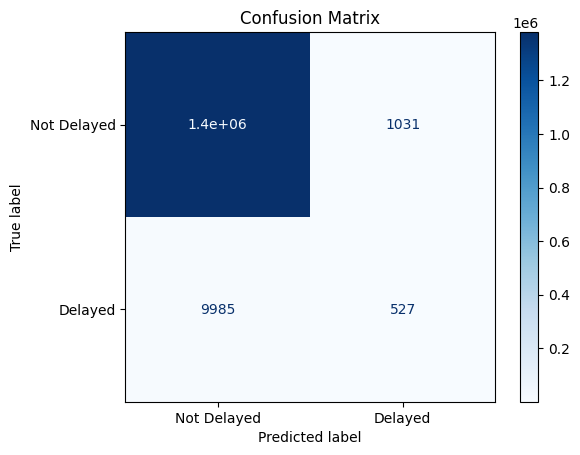

In [53]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=["Not Delayed", "Delayed"]
).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [163]:
cm

# XGBoost
# array([[1225409,  182135],
#        [   2756,    7707]])

# Random Forest
# array([[1407521,      23],
#        [  10375,      88]])

array([[1407439,     105],
       [  10386,      77]])

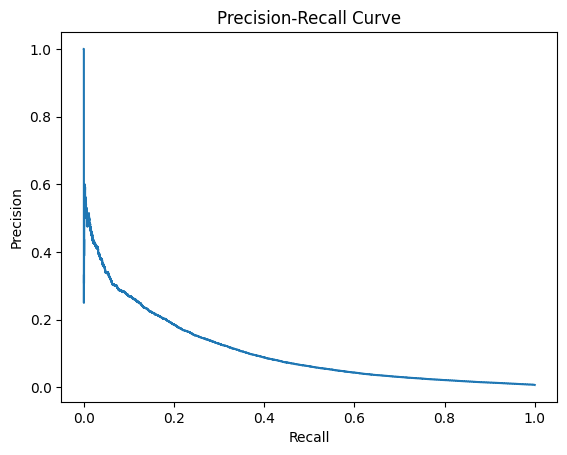

In [54]:
y_scores = model.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure()
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [31]:
from sklearn.metrics import roc_auc_score


y_pred_proba = model.best_estimator_.predict_proba(X_test)

ra_score = roc_auc_score(y_test, y_pred, average="macro", multi_class="ovr")

# xgboost
# 0.803598235336136

# random forest
# 0.5041971245888275

ra_score

0.5235461386485684

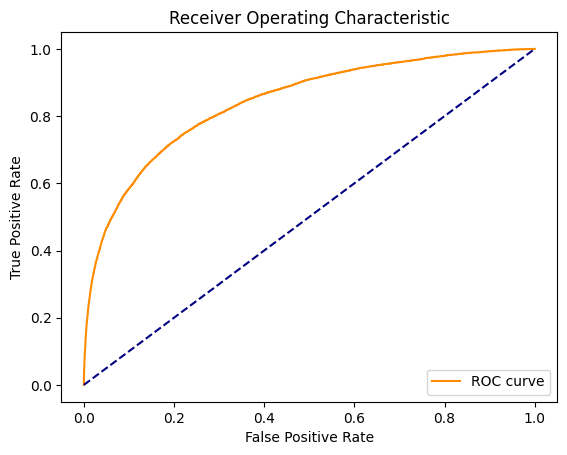

In [32]:
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr, tpr, color="darkorange", label="ROC curve")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

In [55]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


metrics_scores = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
}

df_metrics = pd.DataFrame(list(metrics_scores.items()), columns=["Metric", "Score"])

alt.Chart(df_metrics).mark_bar().encode(
    y="Metric:N", x="Score:Q", color="Metric:N", text=alt.Text("Score:Q", format=".2f")
).properties(title="Evaluation Metrics", width=600, height=300).configure_axis(
    labelFontSize=12, titleFontSize=14
)

alt.Chart(...)